In [14]:
import pandas as pa
import matplotlib as plot


def GetData(fileName):
    return pa.read_csv(fileName, header=0, parse_dates=[0], index_col=0)


exchangeRatesSeries = GetData('exchange.csv')

#view top 10 records
exchangeRatesSeries.head(10)

,USD/TWD close
Date,
2015-01-01,31.654
2015-01-02,31.813
2015-01-05,32.010
2015-01-06,32.014
2015-01-07,31.995
2015-01-08,31.980
2015-01-09,31.908
2015-01-12,31.885
2015-01-13,31.840


<AxesSubplot:xlabel='Date'>

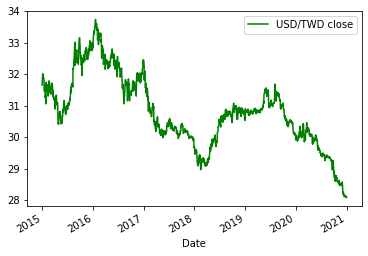

In [15]:
exchangeRatesSeries.plot(color="green")

array([[<AxesSubplot:title={'center':'USD/TWD close'}>]], dtype=object)

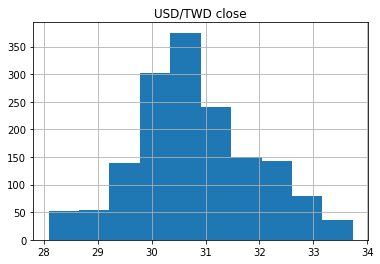

In [16]:
exchangeRatesSeries.hist()

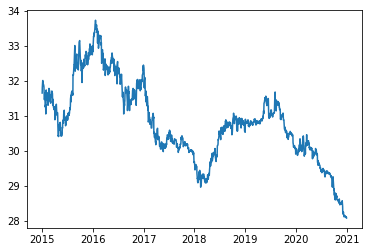

In [17]:
from matplotlib import pyplot

pyplot.plot(exchangeRatesSeries)

Actual=30.916000, Predicted=30.895311
Actual=30.849000, Predicted=30.914025
Actual=30.766000, Predicted=30.849288
Actual=30.799000, Predicted=30.774100
Actual=30.739000, Predicted=30.807674
Actual=30.797000, Predicted=30.742426
Actual=30.866000, Predicted=30.796794
Actual=30.830000, Predicted=30.859656
Actual=30.839000, Predicted=30.821360
Actual=30.866000, Predicted=30.837160
Actual=30.857000, Predicted=30.864886
Actual=30.838000, Predicted=30.853573
Actual=30.783000, Predicted=30.837369
Actual=30.835000, Predicted=30.786960
Actual=30.788000, Predicted=30.837554
Actual=30.791000, Predicted=30.787594
Actual=30.788000, Predicted=30.791341
Actual=30.821000, Predicted=30.789448
Actual=30.818000, Predicted=30.818516
Actual=30.824000, Predicted=30.814348
Actual=30.850000, Predicted=30.821235
Actual=30.830000, Predicted=30.847404
Actual=30.860000, Predicted=30.827363
Actual=30.853000, Predicted=30.858012
Actual=30.772000, Predicted=30.850791
Actual=30.826000, Predicted=30.774067
Actual=30.80

C:\Users\waterbear\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Actual=31.520000, Predicted=31.428329
Actual=31.476000, Predicted=31.513830
Actual=31.444000, Predicted=31.470406
Actual=31.526000, Predicted=31.444953
Actual=31.546000, Predicted=31.526892
Actual=31.565000, Predicted=31.539016
Actual=31.524000, Predicted=31.558036
Actual=31.385000, Predicted=31.523097
Actual=31.350000, Predicted=31.394176
Actual=31.354000, Predicted=31.365977
Actual=31.296000, Predicted=31.363596
Actual=31.354000, Predicted=31.299730
Actual=31.353000, Predicted=31.355891
Actual=31.380000, Predicted=31.350332
Actual=31.410000, Predicted=31.375575
Actual=31.464000, Predicted=31.405875
Actual=31.498000, Predicted=31.457130
Actual=31.494000, Predicted=31.489830
Actual=31.303000, Predicted=31.488252
Actual=31.149000, Predicted=31.310367
Actual=30.955000, Predicted=31.172875
Actual=30.944000, Predicted=30.985465
Actual=30.930000, Predicted=30.968061
Actual=31.072000, Predicted=30.940237
Actual=31.015000, Predicted=31.067145
Actual=31.013000, Predicted=31.005250
Actual=30.95

Actual=30.161000, Predicted=30.257441
Actual=30.293000, Predicted=30.175187
Actual=30.204000, Predicted=30.293099
Actual=30.181000, Predicted=30.201961
Actual=30.276000, Predicted=30.180181
Actual=30.268000, Predicted=30.276774
Actual=30.292000, Predicted=30.261363
Actual=30.186000, Predicted=30.285249
Actual=30.235000, Predicted=30.188322
Actual=30.199000, Predicted=30.237939
Actual=30.089000, Predicted=30.201522
Actual=30.107000, Predicted=30.092839
Actual=30.068000, Predicted=30.114785
Actual=30.036000, Predicted=30.072921
Actual=30.069000, Predicted=30.037999
Actual=30.039000, Predicted=30.070452
Actual=30.087000, Predicted=30.038259
Actual=30.106000, Predicted=30.083837
Actual=30.035000, Predicted=30.101816
Actual=30.029000, Predicted=30.033039
Actual=30.078000, Predicted=30.032087
Actual=30.082000, Predicted=30.078463
Actual=30.061000, Predicted=30.077152
Actual=30.080000, Predicted=30.057756
Actual=30.030000, Predicted=30.079076
Actual=29.960000, Predicted=30.030650
Actual=29.82

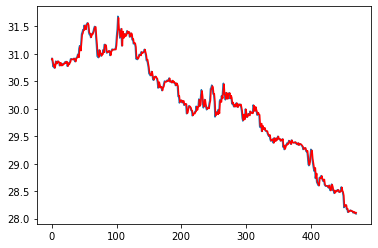

In [19]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0).values

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction
    
#Get exchange rates
ActualData = GetData('exchange.csv')
#Size of exchange rates
NumberOfElements = len(ActualData)

#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()


#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
	ActualValue =  TestData[timepoint]
	#forcast value
	Prediction = StartARIMAForecasting(Actual, 3,1,0)    
	print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
	#add it in the list
	Predictions.append(Prediction)
	Actual.append(ActualValue)

#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot
pyplot.plot(TestData)
pyplot.plot(Predictions, color='red')
pyplot.show()